# Process the data (combine them together)

## Check JH's augmentation data

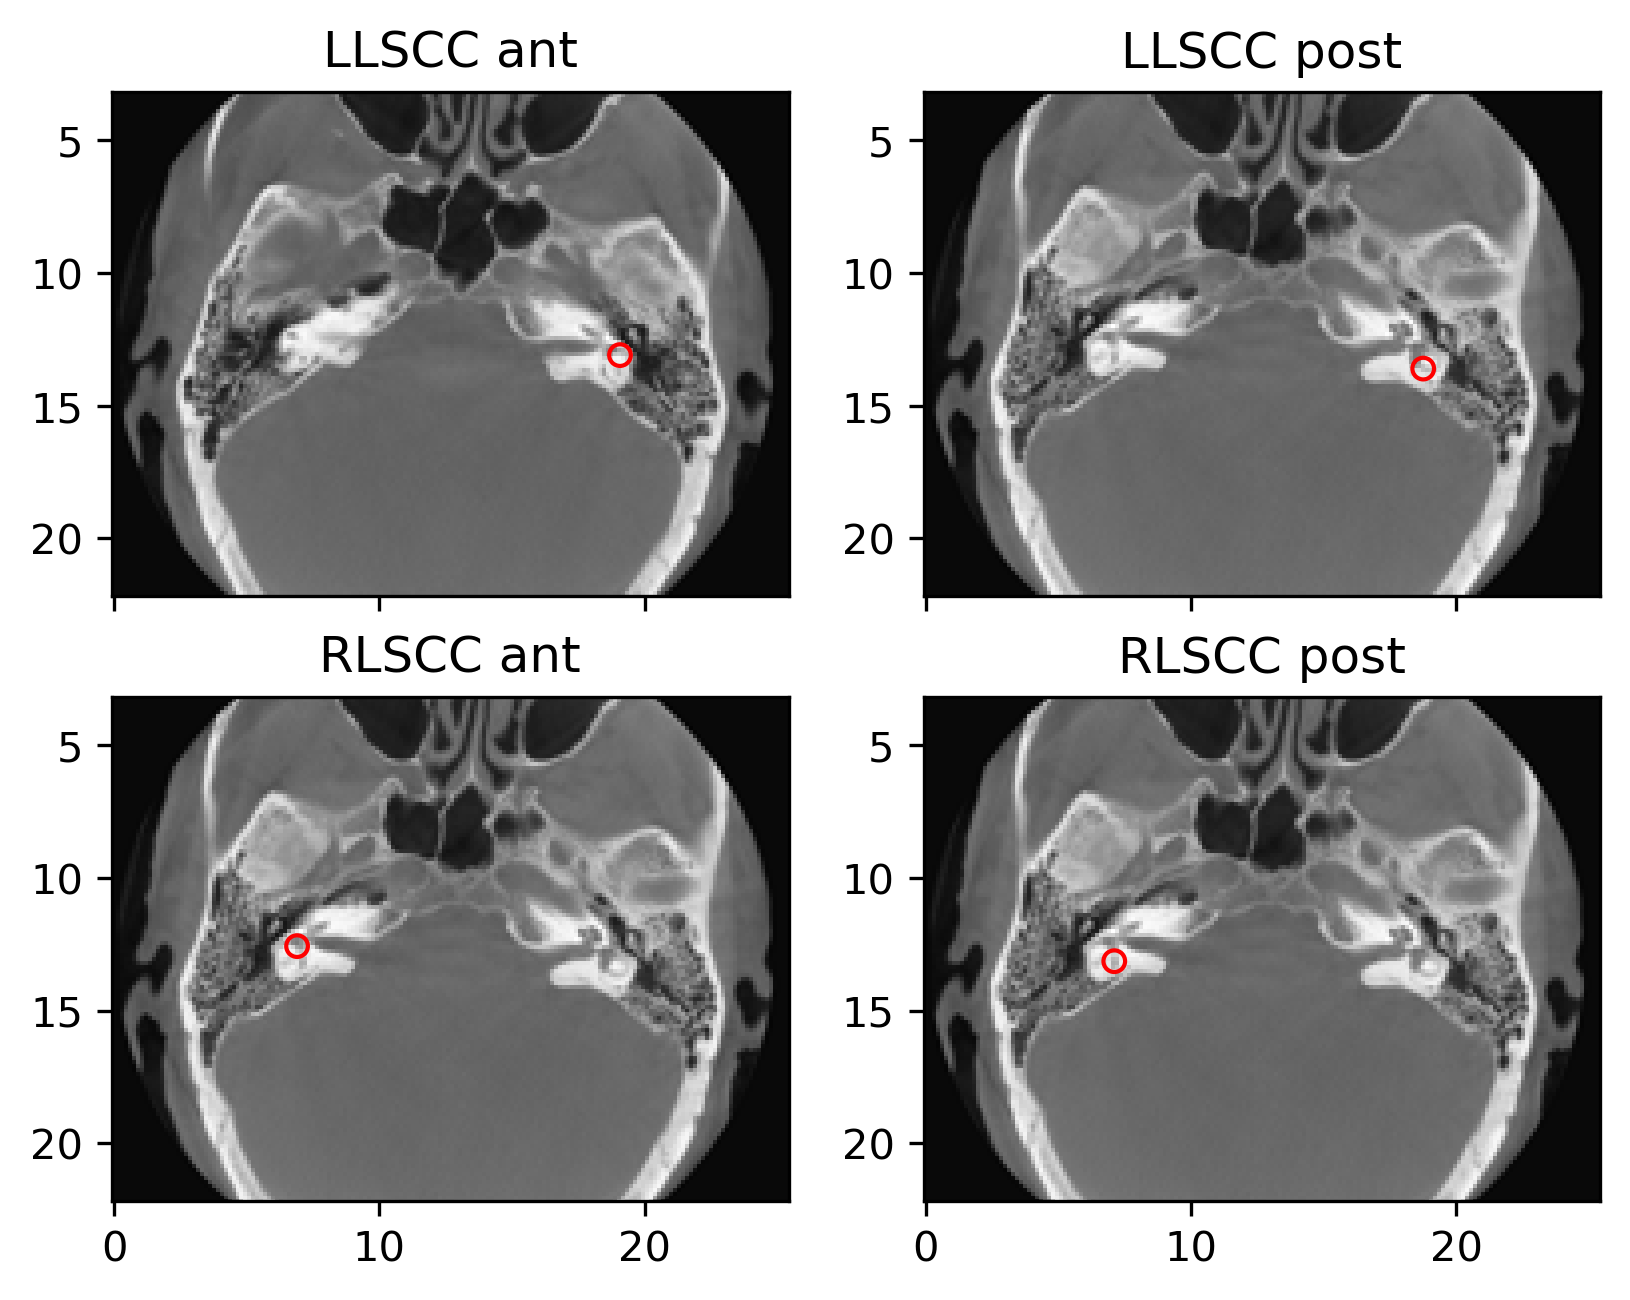

In [29]:
import importlib
import functions

JH_aug_mat_path = "/Volumes/Shawn_SSD/PhD/Project/Date/Tmp/JH_Pre_Augmentation/original_augmentation_data/JH_aug_2.mat"
JH_reshape_vol_mat_path = "/Volumes/Shawn_SSD/PhD/Project/Date/augmentation_from_matlab/Val/Input/FA_17017030_AugVol_2.mat"
JH_reshape_pts_mat_path = "/Volumes/Shawn_SSD/PhD/Project/Date/augmentation_from_matlab/Val/Output/FA_17017030_AugPts_2.mat"

pixel_space = [0.15, 0.15, 0.15]

importlib.reload(functions)

# JH_aug_volume, JH_aug_pts = functions.load_mat_data(JH_aug_mat_path)
# functions.show_pts(JH_aug_volume, JH_aug_pts, pixel_space)

JH_aug_zoomed_volume, JH_aug_zoomed_pts = functions.load_mat_data(JH_reshape_vol_mat_path, JH_reshape_pts_mat_path)
functions.show_pts(JH_aug_zoomed_volume, JH_aug_zoomed_pts, pixel_space)



## Combination

In [31]:
import numpy as np

importlib.reload(functions)

X_val_base_path = "/Volumes/Shawn_SSD/PhD/Project/Date/augmentation_from_matlab/Val/Input"
Y_val_base_path = "/Volumes/Shawn_SSD/PhD/Project/Date/augmentation_from_matlab/Val/Output"

X_val, Y_val = functions.load_mat_data_dir(X_val_base_path, Y_val_base_path)

print(np.shape(X_val), (np.shape(Y_val)))

(100, 170, 170, 30) (100, 4, 3)


In [32]:
X_val_save = np.asarray(X_val)
Y_val_save = np.asarray(Y_val)

X_val_file_path = "X_val_data"
Y_val_file_path = "Y_val_data"

np.save(X_val_file_path, X_val_save)
np.save(Y_val_file_path, Y_val_save)


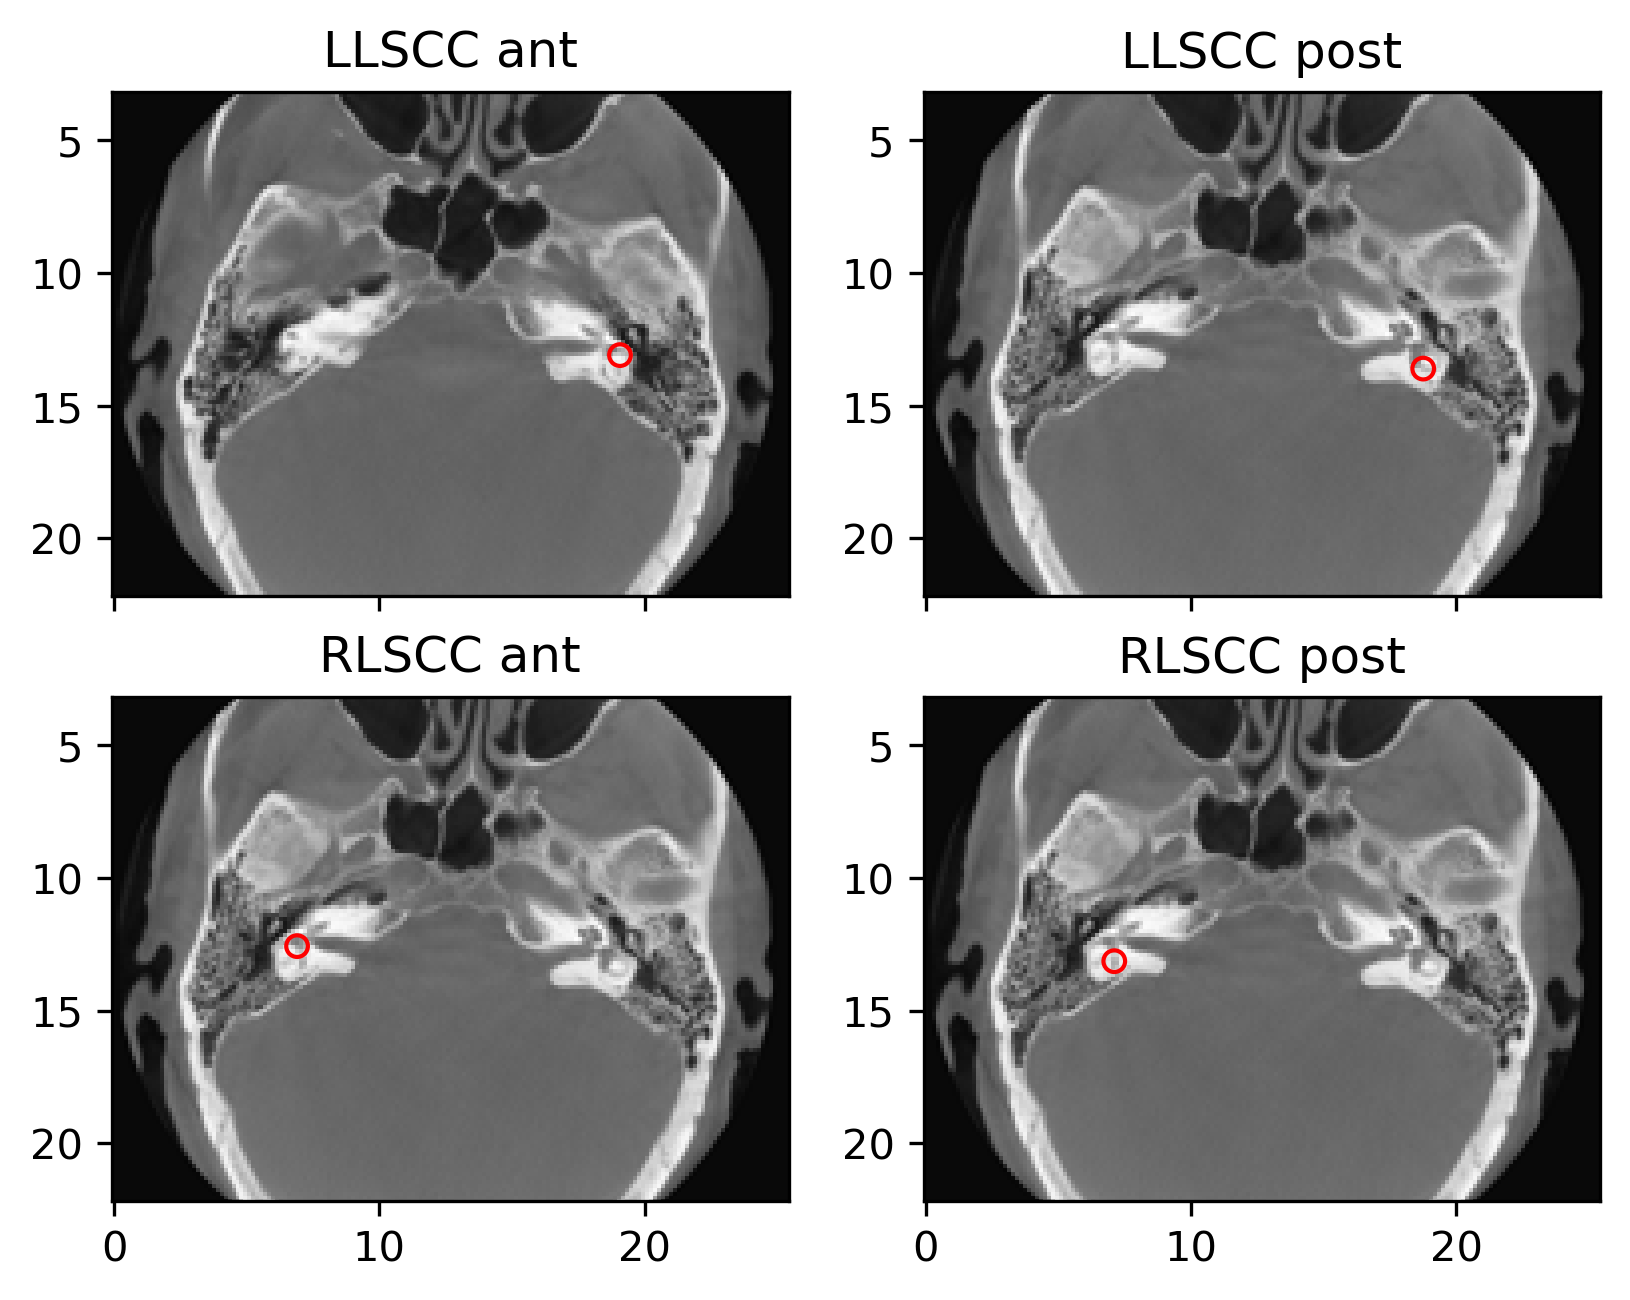

In [33]:
X_val_file_path = "X_val_data.npy"
Y_val_file_path = "Y_val_data.npy"

X_val_load = np.load(X_val_file_path, allow_pickle=True)
Y_val_load = np.load(Y_val_file_path, allow_pickle=True)

functions.show_pts(X_val_load[1, :, :, :], Y_val_load[1, :, :], [0.15, 0.15, 0.15])

In [34]:
print(np.shape(X_val_load[1, :, :, :]), np.shape(Y_val_load[1, :, :]))

(170, 170, 30) (4, 3)
